Source:
https://www.youtube.com/watch?v=ZB7BZMhfPgk
<br>NDArray attributes and methods
https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html

In [1]:
# world without Numpy
a = [1,2,3,4]
b= [4,5,6,7]
a+b

[1, 2, 3, 4, 4, 5, 6, 7]

In [2]:
res = []
for first,second in zip(a,b):
    res.append(first+second)
print(res)

[5, 7, 9, 11]


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [4]:
a = np.array([1,2,3,4])

In [5]:
a.dtype

dtype('int64')

In [6]:
a.ndim

1

In [7]:
a.shape

(4,)

In [8]:
a.size

4

In [9]:
#universal func ufunc
np.sin(a)

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

### Indexing and slicing

In [10]:
a = np.array([1,2,3,4,5,6,7,8,9,10])

In [12]:
#get last three items
a[-3:]

array([ 8,  9, 10])

In [13]:
#grab first three elements
a[:3]

array([1, 2, 3])

In [14]:
a = np.arange(25).reshape(5,5)

In [15]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [16]:
a[:,1::2]

array([[ 1,  3],
       [ 6,  8],
       [11, 13],
       [16, 18],
       [21, 23]])

In [18]:
a[1::2,0:4:2]

array([[ 5,  7],
       [15, 17]])

In [19]:
a[4]

array([20, 21, 22, 23, 24])

In [21]:
img = plt.imread('dc_metro.png')

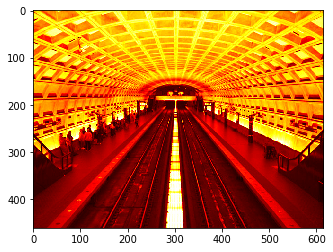

In [25]:
plt.imshow(img,cmap=plt.cm.hot)

In [26]:
def smooth(img):
    avg_img =(    img[1:-1 ,1:-1]  # center
                + img[ :-2 ,1:-1]  # top
                + img[2:   ,1:-1]  # bottom
                + img[1:-1 , :-2]  # left
                + img[1:-1 ,2:  ]  # right
                ) / 5.0
    return avg_img


def smooth_loop(img):
    smoothed = np.zeros((img.shape[0]-2, img.shape[1]-2))
    for r in range(0, img.shape[0]-2):
        for c in range(0, img.shape[1]-2):
            smoothed[r, c] = (  img[r+1, c+1]  # center
                              + img[r  , c+1]  # top
                              + img[r+2, c+1]  # bottom
                              + img[r+1, c  ]  # left
                              + img[r+1, c+2]  # right
                             ) / 5.0
    return smoothed

In [27]:
avg_img = smooth(img)

Text(0.5, 1.0, 'smoothed once')

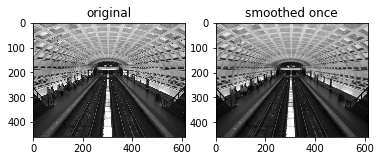

In [33]:
plt.figure()
# Set colormap so that images are plotted in gray scale.
plt.gray()
# Plot the original image first
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('original')

# Now the filtered image.
plt.subplot(1,2,2)
plt.imshow(avg_img)
plt.title('smoothed once')



Text(0.5, 1.0, 'difference')

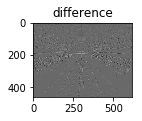

In [34]:
# And finally the difference between the two.
plt.subplot(1,3,3)
plt.imshow(img[1:-1,1:-1] - avg_img)
plt.title('difference')

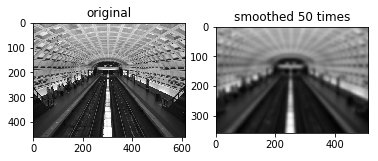

In [35]:
# Bonus: Re-filter the image by passing the result image
#        through the filter again.  Do this 50 times and plot
#        the resulting image.

for num in range(50):
    avg_img = smooth(avg_img)

# Plot the original image first
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('original')

# Now the filtered image.
plt.subplot(1,2,2)
plt.imshow(avg_img)
plt.title('smoothed 50 times')

assert np.allclose(smooth(img), smooth_loop(img))

plt.show()

In [40]:
%timeit smooth(img)

820 µs ± 17.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [41]:
%timeit smooth_loop(img)

757 ms ± 14.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Fancy Indexing

In [46]:
a = np.arange(0,80,10)

In [47]:
a

array([ 0, 10, 20, 30, 40, 50, 60, 70])

In [49]:
indices = [1,2,-3]

In [50]:
a[indices]

array([10, 20, 50])

In [51]:
a[indices]=99

In [52]:
a

array([ 0, 99, 99, 30, 40, 99, 60, 70])

Indexing with booleans

In [53]:
b = np.array([-1,-2,-3,0,1,2,3,4])

In [54]:
negatives = b<0
negatives

array([ True,  True,  True, False, False, False, False, False])

In [55]:
b[negatives]

array([-1, -2, -3])

In [56]:
b[negatives]=0
b

array([0, 0, 0, 0, 1, 2, 3, 4])

Exercise
1. Extract numbers 
2. Select all whic are divisble by 3

In [57]:
a = np.arange(25).reshape(5,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [59]:
a[[0,2,3],1:]

array([[ 1,  2,  3,  4],
       [11, 12, 13, 14],
       [16, 17, 18, 19]])

In [61]:
a[[0],[2]]

array([2])

In [63]:
a[[0,2,3,3],[2,3,1,4]]

array([ 2, 13, 16, 19])

In [60]:
#2.

a[a%3==0]

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24])

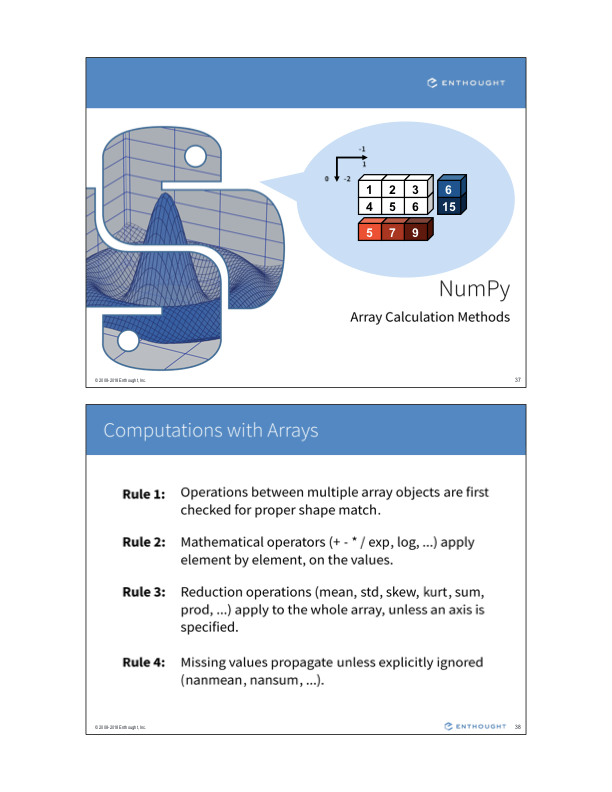                                                        

In [74]:
#Rule 1
a = np.arange(5).reshape(5,1)
a.shape

(5, 1)

In [72]:
b = np.arange(3).reshape(1,3)
b.shape

(1, 3)

In [76]:
c=a+b
c

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

In [75]:
#Rule 3

In [77]:
np.sum(c,axis=0)

array([10, 15, 20])

In [80]:
np.sum(c,axis=1)

array([ 3,  6,  9, 12, 15])

In [83]:
c.sum(axis=0)

array([10, 15, 20])

#### Mathematical functions
1. Sum, Prod
2. min, max, argmin, argmax
3. ptp (max-min)

#### Stats
1. Mean, std, var

#### Truth value testing
1. Any, All

In [89]:
a = np.array([1,2,3,4,5,6,6])

In [91]:
#returns indices
np.where(a>3)

(array([3, 4, 5, 6]),)

In [104]:
a = np.array([[5,6],[2,3],[8,7]])
a

array([[5, 6],
       [2, 3],
       [8, 7]])

In [105]:
a.max()

8

In [111]:
#This will consider 2d array as 1D
a.argmax()

4

In [109]:
#This will show th correct location
np.unravel_index(a.argmax(),a.shape)

(2, 0)